# Exploratory Data Analysis (EDA)

- Second deep dive (Vertiefung)
- Goal: understand the emotional and linguistic structure of the dataset.
- Compared post length, sentiment scores and created visualizations to identify patterns.
- The collected insights from EDA helped validate emotional-linguistic difference and guided the choice of features for model training.

In [1]:
# loading the cleaned data
import pandas as pd
df = pd.read_csv("..\data\mental_health_data_cleaned.csv")
df.head()

,timestamp,title,selftext,subreddit,label
0,1572360722,Our most-broken and least-understood rules is ...,We understand that most people who reply immed...,depression,depression
1,1744611968,"Regular check-in post, with essential informat...",Welcome to /r/depression's check-in post - a p...,depression,depression
2,1750788168,My poor child,My daughter is on 1200 lithium and 80 mg Proza...,depression,depression
3,1750730462,I’m a dad. I want to commit suicide.,I’m a dad to 3 amazing girls. I turned 30 in D...,depression,depression
4,1750789680,life is hell for neurodivergent people,Life is hard for everyone but this world is cl...,depression,depression


In [2]:
# basic stats and label distribution
print("Label counts:")
print(df["label"].value_counts())
      
# adding length column
df["length"] = df["selftext"].str.len()

# quick summary
df.describe(include='all')

Label counts:
label
depression    500
bipolar       494
anxiety       483
Name: count, dtype: int64


,timestamp,title,selftext,subreddit,label,length
count,1.477000e+03,1477,1476,1477,1477,1476.000000
unique,NaN,1465,1475,3,3,NaN
top,NaN,I need help,I have been struggling with extreme anxiety fo...,depression,depression,NaN
freq,NaN,3,2,500,500,NaN
mean,1.750490e+09,NaN,NaN,NaN,NaN,933.031843
std,4.651698e+06,NaN,NaN,NaN,NaN,967.165345
min,1.572361e+09,NaN,NaN,NaN,NaN,23.000000
25%,1.750596e+09,NaN,NaN,NaN,NaN,398.000000
50%,1.750683e+09,NaN,NaN,NaN,NaN,667.000000
75%,1.750740e+09,NaN,NaN,NaN,NaN,1182.250000


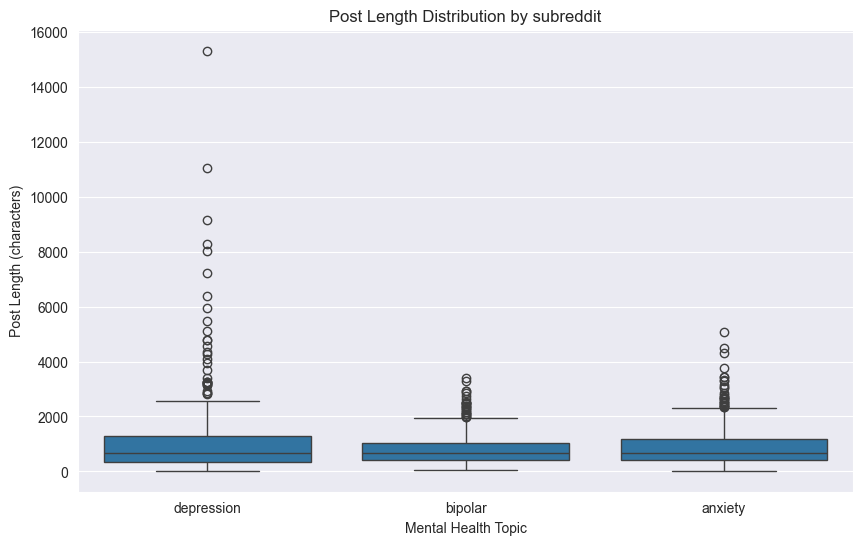

In [3]:
# visualizing the length of posts
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x="label", y="length", data=df)
plt.title("Post Length Distribution by subreddit")
plt.xlabel("Mental Health Topic")
plt.ylabel("Post Length (characters)")
plt.show()

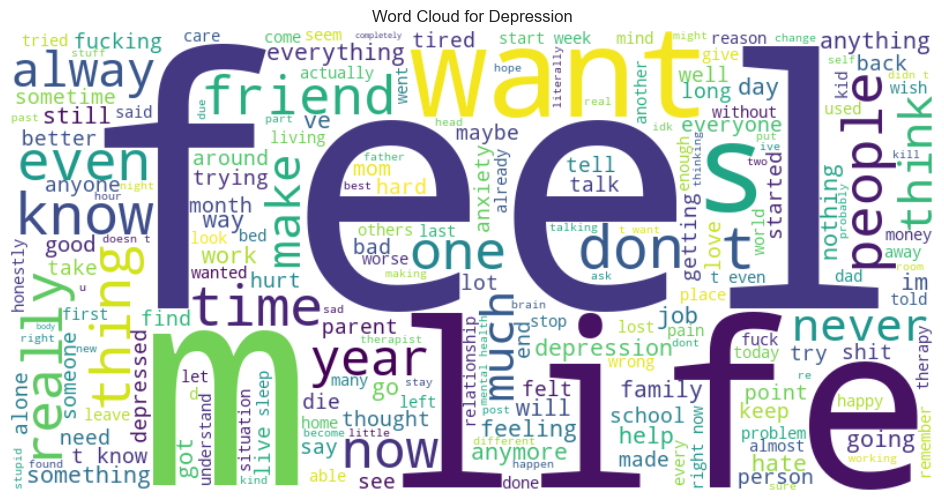

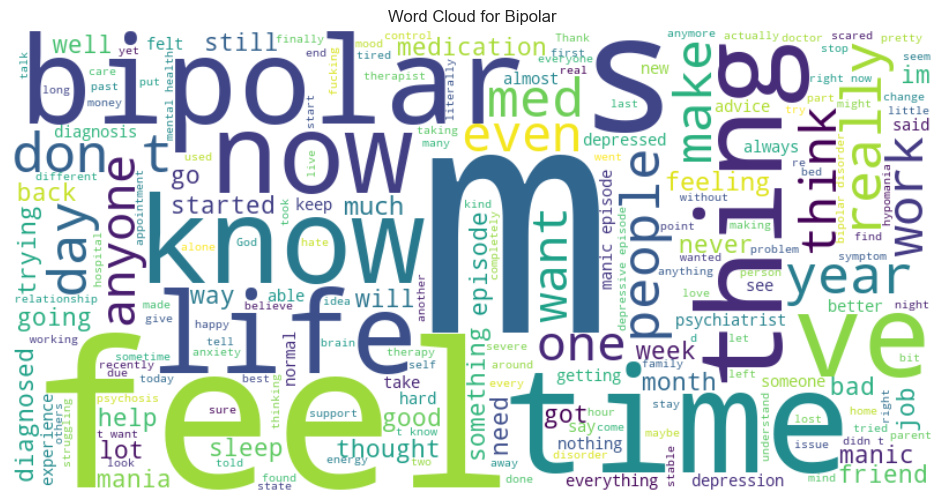

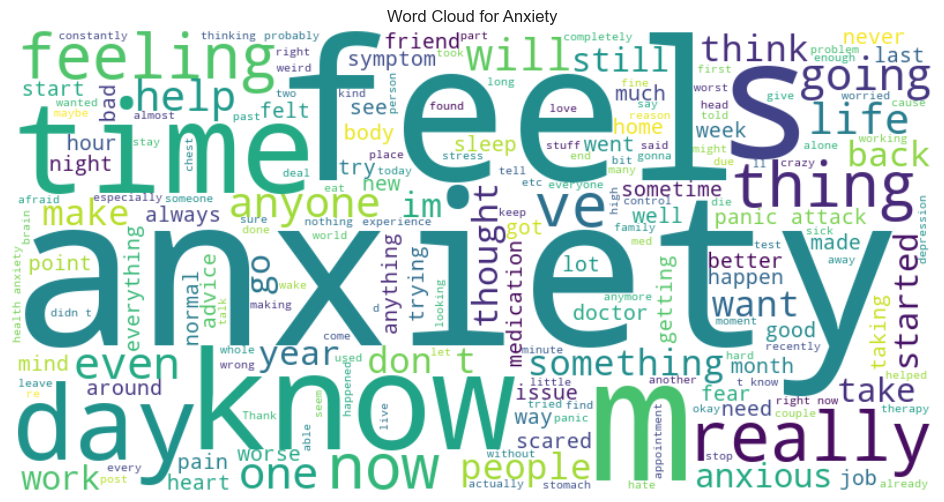

In [4]:
# generating word clouds per label

from wordcloud import WordCloud

for label in df["label"].unique():
    text = " ".join(df[df["label"] == label]["selftext"].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {label.capitalize()}")
    plt.show()


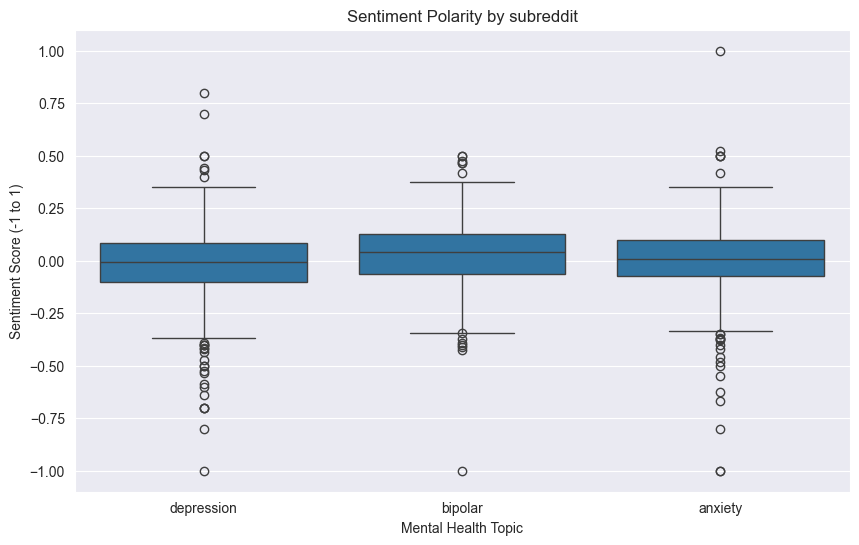

In [5]:
# adding sentiment scores with textblob

from textblob import TextBlob

def get_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    return None

df["sentiment"] = df["selftext"].apply(get_sentiment)

# visualizing sentiment by label
plt.figure(figsize=(10,6))
sns.boxplot(x="label", y="sentiment", data=df)
plt.title("Sentiment Polarity by subreddit")
plt.xlabel("Mental Health Topic")
plt.ylabel("Sentiment Score (-1 to 1)")
plt.show()

### Key Takeaways from the plot:

1. All 3 subreddits cluster around 0 (neutral/negative)

--> Most posts are emotionally flat or slightly downbeat which is expected for people struggling with mental health issues.

2. r/depression shows more strong negatives (longer tail below 0).

3. r/anxiety and r/bipolar also contain some positive outliers

--> Possibly people sharing hope, recovery or mania (in r/bipolar's case).

4. Sentiment range is fairly similar across topics

--> but r/depression seems to have a lower average.

In [6]:
# calculating average (mean) sentiment per label

df.groupby("label")["sentiment"].mean()

label
anxiety      -0.001822
bipolar       0.032418
depression   -0.020477
Name: sentiment, dtype: float64

In [7]:
# saving intermediate dataset with sentiment scores

df.to_csv("..\data\mental_health_data_with_sentiment.csv", index=False)
print("Data with sentiment scores saved successfully.")

Data with sentiment scores saved successfully.
